In [1]:
import pickle
from glob import iglob
import numpy as np
import librosa
from shutil import rmtree
from constants import *
import speech_recognition as speech_r

DATA_AUDIO_DIR = '../test_train_data'
DATA_RESAMPLED_AUDIO_DIR = '../resampled_train_data'

list_dir = os.listdir(DATA_AUDIO_DIR)
list_dir.sort()

r = speech_r.Recognizer() 

OUTPUT_DIR = '../output'
OUTPUT_DIR_TRAIN = os.path.join(OUTPUT_DIR, 'train')
OUTPUT_DIR_TEST = os.path.join(OUTPUT_DIR, 'test')
OUTPUT_DIR_RESAMPLED_TRAIN = os.path.join(OUTPUT_DIR, 'resampled_train')
OUTPUT_DIR_RESAMPLED_TEST = os.path.join(OUTPUT_DIR, 'resampled_test')

PAD_SIZE = 0
TARGET_LENGTH = 100000
TARGET_SR = 8000
MAX_AUDIO_LENGTH = 50
AUDIO_LENGTH = TARGET_LENGTH
SEGMENT_NUM = 1

/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
def mkdir_p(path):
    import errno
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise


def del_folder(path):
    try:
        rmtree(path)
    except:
        pass

### Delete pickle file & Make directory

In [82]:
del_folder(OUTPUT_DIR_TRAIN)
del_folder(OUTPUT_DIR_TEST)
mkdir_p(OUTPUT_DIR_TRAIN)
mkdir_p(OUTPUT_DIR_TEST)

In [37]:
del_folder(OUTPUT_DIR_RESAMPLED_TRAIN)
del_folder(OUTPUT_DIR_RESAMPLED_TEST)
mkdir_p(OUTPUT_DIR_RESAMPLED_TRAIN)
mkdir_p(OUTPUT_DIR_RESAMPLED_TEST)

In [84]:
del_folder(DATA_RESAMPLED_AUDIO_DIR)
mkdir_p(DATA_RESAMPLED_AUDIO_DIR)

## Audio Resampling 

음성 길이를 TARGET_LENGTH로 맞추기 위한 전처리 진행   
Default Samplerate는 TARGET_SR 이며, TARGET_SR로 Audio를 load 하여 Audio Duration을 측정한다.  

**Audio Duration X Sample Rate = Result Audio Length**   

Audio Duration과 Result Audio Length(TARGET_LENGTH)를 통해 Sample Rate를 구한다.  


In [4]:
def resampling_audio():
     for i, wav_filename in enumerate(iglob(os.path.join(DATA_AUDIO_DIR, '**/**.wav'), recursive=True)):
        y, sr = librosa.load(wav_filename, sr=TARGET_SR, mono=True, duration=MAX_AUDIO_LENGTH)
        audio_duration = len(y) / sr
        
        resample_sr = TARGET_LENGTH / audio_duration        
        resample = librosa.resample(y, sr, resample_sr)
        print(i, wav_filename)
        print("Default SR : {}, Audio Length(Default SR) : {}, Audio Duration : {}".format(TARGET_SR, len(y), audio_duration))
        print("Audio Duration : {}, Resampling SR : {}, Result Audio Length : {}".format(audio_duration, resample_sr, len(resample)))
        
        if len(resample) < TARGET_LENGTH:
            resample = np.concatenate((resample, np.zeros(shape=(TARGET_LENGTH - len(resample), 1))))
        resample = resample[:TARGET_LENGTH]
        
        print("Final Audio Length : {}".format(len(resample)))

        
        output_folder = DATA_RESAMPLED_AUDIO_DIR
        if not os.path.exists(os.path.join(DATA_RESAMPLED_AUDIO_DIR, wav_filename.split('/')[2])):
                mkdir_p(os.path.join(DATA_RESAMPLED_AUDIO_DIR, wav_filename.split('/')[2]))
        output_filename = os.path.join(DATA_RESAMPLED_AUDIO_DIR, wav_filename.split('/')[2], str(wav_filename.split('/')[3][0]+".pkl"))
        print("Output File Name: {}\n".format(output_filename))
        
        result = {'resampled_audio': resample,
               'resample_sr': resample_sr}

        with open(output_filename, 'wb') as w:
                  pickle.dump(result, w)


In [86]:
resampling_audio()

0 ../test_train_data/2017019770032_kimdayeong/5.wav
Default SR : 8000, Audio Length(Default SR) : 284331, Audio Duration : 35.541375
Audio Duration : 35.541375, Resampling SR : 2813.6221516471996, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770032_kimdayeong/5.pkl

1 ../test_train_data/2017019770032_kimdayeong/1.wav
Default SR : 8000, Audio Length(Default SR) : 291158, Audio Duration : 36.39475
Audio Duration : 36.39475, Resampling SR : 2747.6490427877648, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770032_kimdayeong/1.pkl

2 ../test_train_data/2017019770032_kimdayeong/3.wav
Default SR : 8000, Audio Length(Default SR) : 274432, Audio Duration : 34.304
Audio Duration : 34.304, Resampling SR : 2915.1119402985073, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770032_kimdayeong/3.pkl

3 ../test_train_data/201

26 ../test_train_data/2017019880039_seojuyeon/1.wav
Default SR : 8000, Audio Length(Default SR) : 231936, Audio Duration : 28.992
Audio Duration : 28.992, Resampling SR : 3449.2273730684324, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880039_seojuyeon/1.pkl

27 ../test_train_data/2017019880039_seojuyeon/3.wav
Default SR : 8000, Audio Length(Default SR) : 239787, Audio Duration : 29.973375
Audio Duration : 29.973375, Resampling SR : 3336.2942945197196, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880039_seojuyeon/3.pkl

28 ../test_train_data/2017019880039_seojuyeon/2.wav
Default SR : 8000, Audio Length(Default SR) : 232448, Audio Duration : 29.056
Audio Duration : 29.056, Resampling SR : 3441.6299559471363, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880039_seojuyeon/2.pkl

29 ../test_train_data/201701988

52 ../test_train_data/2017019880034_leesujung/3.wav
Default SR : 8000, Audio Length(Default SR) : 244274, Audio Duration : 30.53425
Audio Duration : 30.53425, Resampling SR : 3275.0108484734355, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880034_leesujung/3.pkl

53 ../test_train_data/2017019880034_leesujung/2.wav
Default SR : 8000, Audio Length(Default SR) : 238702, Audio Duration : 29.83775
Audio Duration : 29.83775, Resampling SR : 3351.459141523741, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880034_leesujung/2.pkl

54 ../test_train_data/2017019880034_leesujung/4.wav
Default SR : 8000, Audio Length(Default SR) : 255048, Audio Duration : 31.881
Audio Duration : 31.881, Resampling SR : 3136.664471001537, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880034_leesujung/4.pkl

55 ../test_train_data/201701988

78 ../test_train_data/2017019880027_leesol/2.wav
Default SR : 8000, Audio Length(Default SR) : 214553, Audio Duration : 26.819125
Audio Duration : 26.819125, Resampling SR : 3728.6824234571413, Result Audio Length : 100001
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880027_leesol/2.pkl

79 ../test_train_data/2017019880027_leesol/4.wav
Default SR : 8000, Audio Length(Default SR) : 209352, Audio Duration : 26.169
Audio Duration : 26.169, Resampling SR : 3821.3152967251326, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880027_leesol/4.pkl

80 ../test_train_data/2017019880037_jusunghyun/5.wav
Default SR : 8000, Audio Length(Default SR) : 186503, Audio Duration : 23.312875
Audio Duration : 23.312875, Resampling SR : 4289.4752363232765, Result Audio Length : 100001
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880037_jusunghyun/5.pkl

81 ../test_train_data/2017019880037

104 ../test_train_data/2017019770030_leejeongju/4.wav
Default SR : 8000, Audio Length(Default SR) : 218508, Audio Duration : 27.3135
Audio Duration : 27.3135, Resampling SR : 3661.1931828582933, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770030_leejeongju/4.pkl

105 ../test_train_data/2017019880022_kimjaein/5.wav
Default SR : 8000, Audio Length(Default SR) : 224758, Audio Duration : 28.09475
Audio Duration : 28.09475, Resampling SR : 3559.38387065199, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880022_kimjaein/5.pkl

106 ../test_train_data/2017019880022_kimjaein/1.wav
Default SR : 8000, Audio Length(Default SR) : 225440, Audio Duration : 28.18
Audio Duration : 28.18, Resampling SR : 3548.6160397444996, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880022_kimjaein/1.pkl

107 ../test_train_data/20170198800

131 ../test_train_data/2017019770035_leehyojin/1.wav
Default SR : 8000, Audio Length(Default SR) : 273408, Audio Duration : 34.176
Audio Duration : 34.176, Resampling SR : 2926.0299625468165, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770035_leehyojin/1.pkl

132 ../test_train_data/2017019770035_leehyojin/3.wav
Default SR : 8000, Audio Length(Default SR) : 265216, Audio Duration : 33.152
Audio Duration : 33.152, Resampling SR : 3016.4092664092664, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770035_leehyojin/3.pkl

133 ../test_train_data/2017019770035_leehyojin/2.wav
Default SR : 8000, Audio Length(Default SR) : 264192, Audio Duration : 33.024
Audio Duration : 33.024, Resampling SR : 3028.100775193798, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770035_leehyojin/2.pkl

134 ../test_train_data/201701977003

157 ../test_train_data/2017019880001_kimsubin/3.wav
Default SR : 8000, Audio Length(Default SR) : 174615, Audio Duration : 21.826875
Audio Duration : 21.826875, Resampling SR : 4581.507888783895, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880001_kimsubin/3.pkl

158 ../test_train_data/2017019880001_kimsubin/2.wav
Default SR : 8000, Audio Length(Default SR) : 180745, Audio Duration : 22.593125
Audio Duration : 22.593125, Resampling SR : 4426.125204016708, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880001_kimsubin/2.pkl

159 ../test_train_data/2017019880001_kimsubin/4.wav
Default SR : 8000, Audio Length(Default SR) : 180187, Audio Duration : 22.523375
Audio Duration : 22.523375, Resampling SR : 4439.831952360603, Result Audio Length : 100001
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880001_kimsubin/4.pkl

160 ../test_train_data/20

183 ../test_train_data/2017019740017_kwakmihyang/2.wav
Default SR : 8000, Audio Length(Default SR) : 245575, Audio Duration : 30.696875
Audio Duration : 30.696875, Resampling SR : 3257.6605924870205, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740017_kwakmihyang/2.pkl

184 ../test_train_data/2017019740017_kwakmihyang/4.wav
Default SR : 8000, Audio Length(Default SR) : 240559, Audio Duration : 30.069875
Audio Duration : 30.069875, Resampling SR : 3325.587485814291, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740017_kwakmihyang/4.pkl

185 ../test_train_data/2017019880018_wonjoonho/5.wav
Default SR : 8000, Audio Length(Default SR) : 241372, Audio Duration : 30.1715
Audio Duration : 30.1715, Resampling SR : 3314.386092835954, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880018_wonjoonho/5.pkl

186 ../test_tr

209 ../test_train_data/2017019740021_kwakbokyeong/4.wav
Default SR : 8000, Audio Length(Default SR) : 310443, Audio Duration : 38.805375
Audio Duration : 38.805375, Resampling SR : 2576.9625986090846, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740021_kwakbokyeong/4.pkl

210 ../test_train_data/2017019770017_hansohee/5.wav
Default SR : 8000, Audio Length(Default SR) : 269644, Audio Duration : 33.7055
Audio Duration : 33.7055, Resampling SR : 2966.8748423847737, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770017_hansohee/5.pkl

211 ../test_train_data/2017019770017_hansohee/1.wav
Default SR : 8000, Audio Length(Default SR) : 273089, Audio Duration : 34.136125
Audio Duration : 34.136125, Resampling SR : 2929.4479089234646, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770017_hansohee/1.pkl

212 ../test_train_

234 ../test_train_data/2017019880005_kimjihyeon/4.wav
Default SR : 8000, Audio Length(Default SR) : 247686, Audio Duration : 30.96075
Audio Duration : 30.96075, Resampling SR : 3229.8959166040872, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880005_kimjihyeon/4.pkl

235 ../test_train_data/2017019880031_ahnjiwoo/5.wav
Default SR : 8000, Audio Length(Default SR) : 255830, Audio Duration : 31.97875
Audio Duration : 31.97875, Resampling SR : 3127.076574287613, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880031_ahnjiwoo/5.pkl

236 ../test_train_data/2017019880031_ahnjiwoo/1.wav
Default SR : 8000, Audio Length(Default SR) : 260950, Audio Duration : 32.61875
Audio Duration : 32.61875, Resampling SR : 3065.7214025675416, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880031_ahnjiwoo/1.pkl

237 ../test_train_data/20

259 ../test_train_data/2017019880015_leejungjoon/4.wav
Default SR : 8000, Audio Length(Default SR) : 197600, Audio Duration : 24.7
Audio Duration : 24.7, Resampling SR : 4048.582995951417, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880015_leejungjoon/4.pkl

260 ../test_train_data/2017019740007_leekyeongeun/5.wav
Default SR : 8000, Audio Length(Default SR) : 245920, Audio Duration : 30.74
Audio Duration : 30.74, Resampling SR : 3253.0904359141186, Result Audio Length : 100001
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740007_leekyeongeun/5.pkl

261 ../test_train_data/2017019740007_leekyeongeun/1.wav
Default SR : 8000, Audio Length(Default SR) : 275446, Audio Duration : 34.43075
Audio Duration : 34.43075, Resampling SR : 2904.380531937294, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740007_leekyeongeun/1.pkl

262 ../test_train_data

285 ../test_train_data/2017019880019_wonsonghee/5.wav
Default SR : 8000, Audio Length(Default SR) : 266937, Audio Duration : 33.367125
Audio Duration : 33.367125, Resampling SR : 2996.9618299448935, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880019_wonsonghee/5.pkl

286 ../test_train_data/2017019880019_wonsonghee/1.wav
Default SR : 8000, Audio Length(Default SR) : 271395, Audio Duration : 33.924375
Audio Duration : 33.924375, Resampling SR : 2947.7330090827027, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880019_wonsonghee/1.pkl

287 ../test_train_data/2017019880019_wonsonghee/3.wav
Default SR : 8000, Audio Length(Default SR) : 264522, Audio Duration : 33.06525
Audio Duration : 33.06525, Resampling SR : 3024.323118682, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880019_wonsonghee/3.pkl

288 ../test_trai

311 ../test_train_data/2017019770021_heoyoonjung/1.wav
Default SR : 8000, Audio Length(Default SR) : 194119, Audio Duration : 24.264875
Audio Duration : 24.264875, Resampling SR : 4121.1833978126815, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770021_heoyoonjung/1.pkl

312 ../test_train_data/2017019770021_heoyoonjung/3.wav
Default SR : 8000, Audio Length(Default SR) : 180187, Audio Duration : 22.523375
Audio Duration : 22.523375, Resampling SR : 4439.831952360603, Result Audio Length : 100001
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770021_heoyoonjung/3.pkl

313 ../test_train_data/2017019770021_heoyoonjung/2.wav
Default SR : 8000, Audio Length(Default SR) : 180745, Audio Duration : 22.593125
Audio Duration : 22.593125, Resampling SR : 4426.125204016708, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770021_heoyoonjung/2.pkl

314 ..

337 ../test_train_data/2017019740040_kimjihyeon/3.wav
Default SR : 8000, Audio Length(Default SR) : 254115, Audio Duration : 31.764375
Audio Duration : 31.764375, Resampling SR : 3148.180941699624, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740040_kimjihyeon/3.pkl

338 ../test_train_data/2017019740040_kimjihyeon/2.wav
Default SR : 8000, Audio Length(Default SR) : 228643, Audio Duration : 28.580375
Audio Duration : 28.580375, Resampling SR : 3498.90440555801, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740040_kimjihyeon/2.pkl

339 ../test_train_data/2017019740040_kimjihyeon/4.wav
Default SR : 8000, Audio Length(Default SR) : 247686, Audio Duration : 30.96075
Audio Duration : 30.96075, Resampling SR : 3229.8959166040872, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740040_kimjihyeon/4.pkl

340 ../test_tra

363 ../test_train_data/2017019770008_parksomi/2.wav
Default SR : 8000, Audio Length(Default SR) : 242045, Audio Duration : 30.255625
Audio Duration : 30.255625, Resampling SR : 3305.1705261418333, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770008_parksomi/2.pkl

364 ../test_train_data/2017019770008_parksomi/4.wav
Default SR : 8000, Audio Length(Default SR) : 216039, Audio Duration : 27.004875
Audio Duration : 27.004875, Resampling SR : 3703.035100143956, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770008_parksomi/4.pkl

365 ../test_train_data/2017019770005_hyeonsanghyeok/5.wav
Default SR : 8000, Audio Length(Default SR) : 191318, Audio Duration : 23.91475
Audio Duration : 23.91475, Resampling SR : 4181.519773361628, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770005_hyeonsanghyeok/5.pkl

366 ../test_tr

389 ../test_train_data/2017019740015_choihayoung/4.wav
Default SR : 8000, Audio Length(Default SR) : 241483, Audio Duration : 30.185375
Audio Duration : 30.185375, Resampling SR : 3312.8626031646118, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740015_choihayoung/4.pkl

390 ../test_train_data/2017019880012_kimsongyi/5.wav
Default SR : 8000, Audio Length(Default SR) : 233814, Audio Duration : 29.22675
Audio Duration : 29.22675, Resampling SR : 3421.5230910039604, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880012_kimsongyi/5.pkl

391 ../test_train_data/2017019880012_kimsongyi/1.wav
Default SR : 8000, Audio Length(Default SR) : 247638, Audio Duration : 30.95475
Audio Duration : 30.95475, Resampling SR : 3230.521971587559, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880012_kimsongyi/1.pkl

392 ../test_train

415 ../test_train_data/2017019740043_kimtaeri/5.wav
Default SR : 8000, Audio Length(Default SR) : 282112, Audio Duration : 35.264
Audio Duration : 35.264, Resampling SR : 2835.753176043557, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740043_kimtaeri/5.pkl

416 ../test_train_data/2017019740043_kimtaeri/1.wav
Default SR : 8000, Audio Length(Default SR) : 297131, Audio Duration : 37.141375
Audio Duration : 37.141375, Resampling SR : 2692.4151300268236, Result Audio Length : 100001
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740043_kimtaeri/1.pkl

417 ../test_train_data/2017019740043_kimtaeri/3.wav
Default SR : 8000, Audio Length(Default SR) : 276139, Audio Duration : 34.517375
Audio Duration : 34.517375, Resampling SR : 2897.091682087644, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740043_kimtaeri/3.pkl

418 ../test_train_data/2017019

441 ../test_train_data/2017019740012_chaeminjoon/1.wav
Default SR : 8000, Audio Length(Default SR) : 204960, Audio Duration : 25.62
Audio Duration : 25.62, Resampling SR : 3903.2006245120997, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740012_chaeminjoon/1.pkl

442 ../test_train_data/2017019740012_chaeminjoon/3.wav
Default SR : 8000, Audio Length(Default SR) : 239094, Audio Duration : 29.88675
Audio Duration : 29.88675, Resampling SR : 3345.9643487498643, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740012_chaeminjoon/3.pkl

443 ../test_train_data/2017019740012_chaeminjoon/2.wav
Default SR : 8000, Audio Length(Default SR) : 204619, Audio Duration : 25.577375
Audio Duration : 25.577375, Resampling SR : 3909.7053548301965, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740012_chaeminjoon/2.pkl

444 ../test_tr

467 ../test_train_data/2017019740023_heosehun/3.wav
Default SR : 8000, Audio Length(Default SR) : 236032, Audio Duration : 29.504
Audio Duration : 29.504, Resampling SR : 3389.3709327548804, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740023_heosehun/3.pkl

468 ../test_train_data/2017019740023_heosehun/2.wav
Default SR : 8000, Audio Length(Default SR) : 237056, Audio Duration : 29.632
Audio Duration : 29.632, Resampling SR : 3374.730021598272, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740023_heosehun/2.pkl

469 ../test_train_data/2017019740023_heosehun/4.wav
Default SR : 8000, Audio Length(Default SR) : 228864, Audio Duration : 28.608
Audio Duration : 28.608, Resampling SR : 3495.525727069351, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740023_heosehun/4.pkl

470 ../test_train_data/2017019770003_johae

493 ../test_train_data/2017019770014_parkeunbi/2.wav
Default SR : 8000, Audio Length(Default SR) : 243531, Audio Duration : 30.441375
Audio Duration : 30.441375, Resampling SR : 3285.00273065852, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770014_parkeunbi/2.pkl

494 ../test_train_data/2017019770014_parkeunbi/4.wav
Default SR : 8000, Audio Length(Default SR) : 234429, Audio Duration : 29.303625
Audio Duration : 29.303625, Resampling SR : 3412.547082485529, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770014_parkeunbi/4.pkl

495 ../test_train_data/2017019880029_kimminji/5.wav
Default SR : 8000, Audio Length(Default SR) : 242231, Audio Duration : 30.278875
Audio Duration : 30.278875, Resampling SR : 3302.6326110200594, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880029_kimminji/5.pkl

496 ../test_train_dat

519 ../test_train_data/2017019770007_simseungmin/4.wav
Default SR : 8000, Audio Length(Default SR) : 220497, Audio Duration : 27.562125
Audio Duration : 27.562125, Resampling SR : 3628.1672766522897, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770007_simseungmin/4.pkl

520 ../test_train_data/2017019740036_leeyongseok/5.wav
Default SR : 8000, Audio Length(Default SR) : 196608, Audio Duration : 24.576
Audio Duration : 24.576, Resampling SR : 4069.0104166666665, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740036_leeyongseok/5.pkl

521 ../test_train_data/2017019740036_leeyongseok/1.wav
Default SR : 8000, Audio Length(Default SR) : 234496, Audio Duration : 29.312
Audio Duration : 29.312, Resampling SR : 3411.5720524017465, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740036_leeyongseok/1.pkl

522 ../test_trai

545 ../test_train_data/2017019770024_chuminha/5.wav
Default SR : 8000, Audio Length(Default SR) : 195923, Audio Duration : 24.490375
Audio Duration : 24.490375, Resampling SR : 4083.2367817969302, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770024_chuminha/5.pkl

546 ../test_train_data/2017019770024_chuminha/1.wav
Default SR : 8000, Audio Length(Default SR) : 232980, Audio Duration : 29.1225
Audio Duration : 29.1225, Resampling SR : 3433.7711391535754, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770024_chuminha/1.pkl

547 ../test_train_data/2017019770024_chuminha/3.wav
Default SR : 8000, Audio Length(Default SR) : 210394, Audio Duration : 26.29925
Audio Duration : 26.29925, Resampling SR : 3802.389801990551, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770024_chuminha/3.pkl

548 ../test_train_data/201701

571 ../test_train_data/2017019880042_namyeji/1.wav
Default SR : 8000, Audio Length(Default SR) : 251211, Audio Duration : 31.401375
Audio Duration : 31.401375, Resampling SR : 3184.5739239125674, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880042_namyeji/1.pkl

572 ../test_train_data/2017019880042_namyeji/3.wav
Default SR : 8000, Audio Length(Default SR) : 239264, Audio Duration : 29.908
Audio Duration : 29.908, Resampling SR : 3343.5870001337435, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880042_namyeji/3.pkl

573 ../test_train_data/2017019880042_namyeji/2.wav
Default SR : 8000, Audio Length(Default SR) : 258208, Audio Duration : 32.276
Audio Duration : 32.276, Resampling SR : 3098.277357789069, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880042_namyeji/2.pkl

574 ../test_train_data/2017019880042_namy

597 ../test_train_data/2017019770038_kanghyeyun/3.wav
Default SR : 8000, Audio Length(Default SR) : 238144, Audio Duration : 29.768
Audio Duration : 29.768, Resampling SR : 3359.312012899758, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770038_kanghyeyun/3.pkl

598 ../test_train_data/2017019770038_kanghyeyun/2.wav
Default SR : 8000, Audio Length(Default SR) : 258578, Audio Duration : 32.32225
Audio Duration : 32.32225, Resampling SR : 3093.8440238535377, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770038_kanghyeyun/2.pkl

599 ../test_train_data/2017019770038_kanghyeyun/4.wav
Default SR : 8000, Audio Length(Default SR) : 215667, Audio Duration : 26.958375
Audio Duration : 26.958375, Resampling SR : 3709.422396565075, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019770038_kanghyeyun/4.pkl

600 ../test_train_da

623 ../test_train_data/2017019880011_kimjihyun/2.wav
Default SR : 8000, Audio Length(Default SR) : 208980, Audio Duration : 26.1225
Audio Duration : 26.1225, Resampling SR : 3828.1175232079627, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880011_kimjihyun/2.pkl

624 ../test_train_data/2017019880011_kimjihyun/4.wav
Default SR : 8000, Audio Length(Default SR) : 220869, Audio Duration : 27.608625
Audio Duration : 27.608625, Resampling SR : 3622.056513136746, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019880011_kimjihyun/4.pkl

625 ../test_train_data/2017019740014_leesumin/5.wav
Default SR : 8000, Audio Length(Default SR) : 249163, Audio Duration : 31.145375
Audio Duration : 31.145375, Resampling SR : 3210.749589626068, Result Audio Length : 100000
Final Audio Length : 100000
Output File Name: ../resampled_train_data/2017019740014_leesumin/5.pkl

626 ../test_train_data/2

In [38]:
order = 0
list_dir.sort()
class_ids = {list_dir[i]: i for i in range(len(list_dir))}

def extract_class_id(wav_filename):
    return class_ids.get(wav_filename.split('/')[2])

def read_audio_from_filename(filename, target_sr):
    audio, _ = librosa.load(filename, sr=TARGET_SR, mono=True)
    audio = audio.reshape(-1, 1)
    return audio

def get_audio_buf(filename):
    audio_buf = None
    sample_rate = None
    
    with open(filename, 'rb') as f:
        audio_element = pickle.load(f)
        audio_buf = audio_element['resampled_audio']
        sample_rate = audio_element['resample_sr']
    
    return audio_buf, sample_rate

def convert_data():

    for i, wav_filename in enumerate(iglob(os.path.join(DATA_RESAMPLED_AUDIO_DIR, '**/**.pkl'), recursive=True)):
        class_id = extract_class_id(wav_filename)
#         audio_buf = read_audio_from_filename(wav_filename, target_sr=TARGET_SR)
        audio_buf,_ = get_audio_buf(wav_filename)
        print(type(audio_buf))
        
        # normalize mean 0, variance 1
        audio_buf = (audio_buf - np.mean(audio_buf)) / np.std(audio_buf)
        original_length = len(audio_buf)
        print(i, wav_filename, original_length, np.round(np.mean(audio_buf), 4), np.std(audio_buf))
        
        voice_seg = []
        
        if original_length >= AUDIO_LENGTH + PAD_SIZE:
            audio_seg = audio_buf[PAD_SIZE : AUDIO_LENGTH + PAD_SIZE]
            voice_seg.append(audio_seg)
            print("Audio Segment Length : {}".format(len(audio_seg)))
        else:
            print('Drop Audio Segment, Audio length={}'.format(len(audio_buf)))
            
        output_folder = OUTPUT_DIR_RESAMPLED_TRAIN
        if wav_filename[-5:] == '5.pkl':
            output_folder = OUTPUT_DIR_RESAMPLED_TEST
            
        output_filename = os.path.join(output_folder, str(wav_filename[24:-4]).replace('/', '_') + '.pkl')

        out_segs = []
        for i_seg, audio_seg in enumerate(voice_seg) :
            out = {'class_id': class_id,
               'audio': audio_seg,
               'sr': TARGET_SR}
            
            with open(output_filename, 'wb') as w:
                pickle.dump(out, w)

            print("Output File Name : "+output_filename)
        
        print("-----------------")
      

### Convert Data

In [39]:
convert_data()

<class 'numpy.ndarray'>
0 ../resampled_train_data/2017019770032_kimdayeong/4.pkl 100000 -0.0 1.0
Audio Segment Length : 100000
Output File Name : ../output/resampled_train/2017019770032_kimdayeong_4.pkl
-----------------
<class 'numpy.ndarray'>
1 ../resampled_train_data/2017019770032_kimdayeong/3.pkl 100000 0.0 0.99999994
Audio Segment Length : 100000
Output File Name : ../output/resampled_train/2017019770032_kimdayeong_3.pkl
-----------------
<class 'numpy.ndarray'>
2 ../resampled_train_data/2017019770032_kimdayeong/1.pkl 100000 0.0 1.0
Audio Segment Length : 100000
Output File Name : ../output/resampled_train/2017019770032_kimdayeong_1.pkl
-----------------
<class 'numpy.ndarray'>
3 ../resampled_train_data/2017019770032_kimdayeong/5.pkl 100000 -0.0 1.0
Audio Segment Length : 100000
Output File Name : ../output/resampled_test/2017019770032_kimdayeong_5.pkl
-----------------
<class 'numpy.ndarray'>
4 ../resampled_train_data/2017019770032_kimdayeong/2.pkl 100000 -0.0 1.0
Audio Segment L

173 ../resampled_train_data/2017019880014_leedanbee/5.pkl 100000 -0.0 1.0
Audio Segment Length : 100000
Output File Name : ../output/resampled_test/2017019880014_leedanbee_5.pkl
-----------------
<class 'numpy.ndarray'>
174 ../resampled_train_data/2017019880014_leedanbee/2.pkl 100000 -0.0 1.0
Audio Segment Length : 100000
Output File Name : ../output/resampled_train/2017019880014_leedanbee_2.pkl
-----------------
<class 'numpy.ndarray'>
175 ../resampled_train_data/2017019740026_parkyeongseon/4.pkl 100000 0.0 0.99999994
Audio Segment Length : 100000
Output File Name : ../output/resampled_train/2017019740026_parkyeongseon_4.pkl
-----------------
<class 'numpy.ndarray'>
176 ../resampled_train_data/2017019740026_parkyeongseon/3.pkl 100000 -0.0 1.0
Audio Segment Length : 100000
Output File Name : ../output/resampled_train/2017019740026_parkyeongseon_3.pkl
-----------------
<class 'numpy.ndarray'>
177 ../resampled_train_data/2017019740026_parkyeongseon/1.pkl 100000 0.0 1.0
Audio Segment Leng

Output File Name : ../output/resampled_test/2017019880003_kimminji_5.pkl
-----------------
<class 'numpy.ndarray'>
349 ../resampled_train_data/2017019880003_kimminji/2.pkl 100000 0.0 0.9999999
Audio Segment Length : 100000
Output File Name : ../output/resampled_train/2017019880003_kimminji_2.pkl
-----------------
<class 'numpy.ndarray'>
350 ../resampled_train_data/2017019770011_kwonyeonwoo/4.pkl 100000 0.0 1.0
Audio Segment Length : 100000
Output File Name : ../output/resampled_train/2017019770011_kwonyeonwoo_4.pkl
-----------------
<class 'numpy.ndarray'>
351 ../resampled_train_data/2017019770011_kwonyeonwoo/3.pkl 100000 0.0 1.0
Audio Segment Length : 100000
Output File Name : ../output/resampled_train/2017019770011_kwonyeonwoo_3.pkl
-----------------
<class 'numpy.ndarray'>
352 ../resampled_train_data/2017019770011_kwonyeonwoo/1.pkl 100000 -0.0 0.99999994
Audio Segment Length : 100000
Output File Name : ../output/resampled_train/2017019770011_kwonyeonwoo_1.pkl
-----------------
<clas

Output File Name : ../output/resampled_train/2017019770020_nomyungok_3.pkl
-----------------
<class 'numpy.ndarray'>
527 ../resampled_train_data/2017019770020_nomyungok/1.pkl 100000 -0.0 0.9999999
Audio Segment Length : 100000
Output File Name : ../output/resampled_train/2017019770020_nomyungok_1.pkl
-----------------
<class 'numpy.ndarray'>
528 ../resampled_train_data/2017019770020_nomyungok/5.pkl 100000 -0.0 1.0
Audio Segment Length : 100000
Output File Name : ../output/resampled_test/2017019770020_nomyungok_5.pkl
-----------------
<class 'numpy.ndarray'>
529 ../resampled_train_data/2017019770020_nomyungok/2.pkl 100000 -0.0 0.99999994
Audio Segment Length : 100000
Output File Name : ../output/resampled_train/2017019770020_nomyungok_2.pkl
-----------------
<class 'numpy.ndarray'>
530 ../resampled_train_data/2017019770002_kwoneunkyung/4.pkl 100000 -0.0 1.0
Audio Segment Length : 100000
Output File Name : ../output/resampled_train/2017019770002_kwoneunkyung_4.pkl
-----------------
<clas

In [40]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Lambda, Bidirectional, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow import convert_to_tensor
from tensorflow import expand_dims
import numpy as np
import pickle
import os
from glob import glob
import tensorflow

print(tensorflow.__version__)

2.2.0


In [55]:
list_dir = os.listdir(DATA_RESAMPLED_AUDIO_DIR)
list_dir.sort()

class_ids = {list_dir[i]: i for i in range(len(list_dir))}

In [56]:
def m5(num_classes):
    print("Class Num", num_classes)
    print('Using Model M5')
    m = Sequential()
    m.add(Conv1D(128,
                 input_shape=[AUDIO_LENGTH, 1],
                 kernel_size=80,
                 strides=4,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(128,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(256,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(512,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Lambda(lambda x: K.mean(x, axis=1)))  # Same as GAP for 1D Conv Layer
    m.add(Dense(num_classes, activation='softmax'))
    return m

In [57]:
def get_data(file_list):
    def load_into(_filename, _x, _y):
        with open(_filename, 'rb') as f:
            audio_element = pickle.load(f)
            _x.append(audio_element['audio'])
            _y.append(int(audio_element['class_id']))

    x, y = [], []
    for filename in file_list:
        load_into(filename, x, y)
    return np.array(x), np.array(y)

In [58]:
num_classes = len(list_dir)
model = m5(num_classes)

if model is None:
    exit('Something went wrong!!')

model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
print(model.summary())

Class Num 128
Using Model M5
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 25000, 128)        10368     
_________________________________________________________________
batch_normalization_28 (Batc (None, 25000, 128)        512       
_________________________________________________________________
activation_28 (Activation)   (None, 25000, 128)        0         
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 6250, 128)         0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 6250, 128)         49280     
_________________________________________________________________
batch_normalization_29 (Batc (None, 6250, 128)         512       
_________________________________________________________________
activation_29 (Activation

In [59]:
train_files = glob(os.path.join(OUTPUT_DIR_RESAMPLED_TRAIN, '**.pkl'))
print(os.path.join(OUTPUT_DIR_RESAMPLED_TRAIN, '**.pkl'))
x_tr, y_tr = get_data(train_files)

y_tr = to_categorical(y_tr, num_classes=num_classes)
x_tr = x_tr.reshape(-1, x_tr.shape[1], 1)


test_files = glob(os.path.join(OUTPUT_DIR_RESAMPLED_TEST, '**.pkl'))
x_te, y_te = get_data(test_files)

y_te = to_categorical(y_te, num_classes=num_classes)
x_te = x_te.reshape(-1, x_te.shape[1], 1)


print('x_tr.shape =', x_tr.shape)
print('y_tr.shape =', y_tr.shape)
print('x_te.shape =', x_te.shape)
print('y_te.shape =', y_te.shape)

../output/resampled_train/**.pkl
x_tr.shape = (512, 100000, 1)
y_tr.shape = (512, 128)
x_te.shape = (128, 100000, 1)
y_te.shape = (128, 128)


In [ ]:
# if the accuracy does not increase over 10 epochs, reduce the learning rate by half.
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, min_lr=0.00005, verbose=1)
batch_size = 128
history = model.fit(x=x_tr, y=y_tr, batch_size=16, epochs=100, verbose=2, shuffle=True, validation_data=(x_te, y_te), callbacks=[reduce_lr])


Epoch 1/100
32/32 - 30s - loss: 5.2589 - accuracy: 0.0410 - val_loss: 4.6872 - val_accuracy: 0.0234 - lr: 0.0010
Epoch 2/100
32/32 - 30s - loss: 3.6496 - accuracy: 0.1680 - val_loss: 4.7455 - val_accuracy: 0.0078 - lr: 0.0010
Epoch 3/100


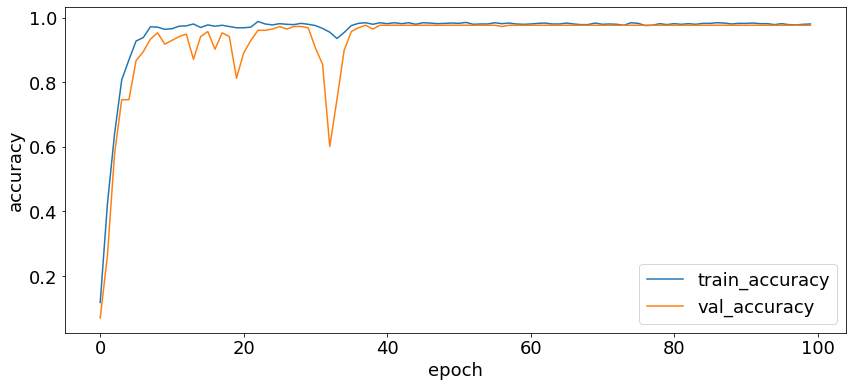

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()

In [ ]:
import pickle
from glob import iglob
import numpy as np
import librosa
from shutil import rmtree
from constants import *


OUTPUT_VAL_DIR = '../output_val'
OUTPUT_DIR_VAL_TRAIN = os.path.join(OUTPUT_VAL_DIR, 'train')
OUTPUT_DIR_VAL_TEST = os.path.join(OUTPUT_VAL_DIR, 'test')

DATA_AUDIO_VAL_DIR = '../test_val_data'

OUTPUT_DIR_RESAMPLED_VAL_TRAIN = os.path.join(OUTPUT_VAL_DIR, 'resampled_train')
OUTPUT_DIR_RESAMPLED_VAL_TEST = os.path.join(OUTPUT_VAL_DIR, 'resampled_test')

DATA_RESAMPLED_AUDIO_VAL_DIR = '../resampled_val_data'

In [73]:
del_folder(DATA_RESAMPLED_AUDIO_VAL_DIR)
mkdir_p(DATA_RESAMPLED_AUDIO_VAL_DIR)

In [ ]:
del_folder(OUTPUT_DIR_VAL_TRAIN)
del_folder(OUTPUT_DIR_VAL_TEST)
mkdir_p(OUTPUT_DIR_VAL_TRAIN)
mkdir_p(OUTPUT_DIR_VAL_TEST)

In [ ]:
del_folder(OUTPUT_DIR_RESAMPLED_VAL_TRAIN)
del_folder(OUTPUT_DIR_RESAMPLED_VAL_TEST)
mkdir_p(OUTPUT_DIR_RESAMPLED_VAL_TRAIN)
mkdir_p(OUTPUT_DIR_RESAMPLED_VAL_TEST)

In [74]:
PAD_SIZE = 10000
TARGET_SR = 22050
AUDIO_LENGTH = TARGET_SR * 10
SEGMENT_NUM = 2

In [ ]:
def resampling_val_audio():
     for i, wav_filename in enumerate(iglob(os.path.join(DATA_AUDIO_VAL_DIR, '**/**.wav'), recursive=True)):
        jackhammer = speech_r.AudioFile(wav_filename)
​
        with jackhammer as source:
            r.adjust_for_ambient_noise(source)
            audio = r.record(source)
            
            output_folder = DATA_RESAMPLED_AUDIO_VAL_DIR
            if not os.path.exists(os.path.join(output_folder, wav_filename.split('/')[2])):
                mkdir_p(os.path.join(output_folder, wav_filename.split('/')[2]))
            output_filename = os.path.join(output_folder, wav_filename.split('/')[2], wav_filename.split('/')[3])
            
            fw = open(output_filename, "wb")
            fw.write(audio.get_wav_data())
            fw.close()

In [ ]:
resampling_val_audio()

In [75]:
def convert_val_data():
    
    for i, wav_filename in enumerate(iglob(os.path.join(DATA_RESAMPLED_AUDIO_VAL_DIR, '**/**.wav'), recursive=True)):
        class_id = extract_class_id(wav_filename)
        audio_buf = read_audio_from_filename(wav_filename, target_sr=TARGET_SR)
        
        # normalize mean 0, variance 1
        audio_buf = (audio_buf - np.mean(audio_buf)) / np.std(audio_buf)
        original_length = len(audio_buf)
        print(i, wav_filename, original_length, np.round(np.mean(audio_buf), 4), np.std(audio_buf))
        
        voice_seg = []
        if original_length > AUDIO_LENGTH * SEGMENT_NUM + PAD_SIZE:
            first_seg = audio_buf[PAD_SIZE : AUDIO_LENGTH + PAD_SIZE]
            second_seg = audio_buf[AUDIO_LENGTH+PAD_SIZE+1 : PAD_SIZE+AUDIO_LENGTH*2+1]
            
            voice_seg.append(first_seg)
            voice_seg.append(second_seg)
            print(AUDIO_LENGTH,len(first_seg),len(second_seg))
        elif original_length > AUDIO_LENGTH + PAD_SIZE:
            first_seg = audio_buf[PAD_SIZE : AUDIO_LENGTH + PAD_SIZE]
            voice_seg.append(first_seg)
            print('Drop 1 Segment, Audio length={}'.format(len(audio_buf)))
        else:
            print('Drop 2 Segment, Audio length={}'.format(len(audio_buf)))
            

        output_folder = OUTPUT_DIR_RESAMPLED_VAL_TRAIN
        if wav_filename[-5:] == '5.wav':
            output_folder = OUTPUT_DIR_RESAMPLED_VAL_TEST

        output_filename = os.path.join(output_folder, str(wav_filename[19:-4]).replace('/', '_') + '.pkl')
        out_segs = []
        for i_seg, audio_seg in enumerate(voice_seg) :
            out = {'class_id': class_id,
               'audio': audio_seg,
               'sr': TARGET_SR}
            
            with open(str(output_filename+"_"+str(i_seg)), 'wb') as w:
                pickle.dump(out, w)

            print(str(output_filename+"_"+str(i_seg)))
        
        print("-----------------")

if __name__ == '__main__':
    convert_val_data()

0 ../test_val_data/2017019880001_kimsubin/12.wav 448762 -0.0 0.9999999
Drop 1 Segment, Audio length=448762
../output_val/train/17019880001_kimsubin_12.pkl_0
-----------------
1 ../test_val_data/2017019880001_kimsubin/5.wav 479744 0.0 1.0
220500 220500 220500
../output_val/test/17019880001_kimsubin_5.pkl_0
../output_val/test/17019880001_kimsubin_5.pkl_1
-----------------
2 ../test_val_data/2017019880001_kimsubin/4.wav 484864 -0.0 1.0
220500 220500 220500
../output_val/train/17019880001_kimsubin_4.pkl_0
../output_val/train/17019880001_kimsubin_4.pkl_1
-----------------
3 ../test_val_data/2017019880001_kimsubin/8.wav 471341 0.0 1.0
220500 220500 220500
../output_val/train/17019880001_kimsubin_8.pkl_0
../output_val/train/17019880001_kimsubin_8.pkl_1
-----------------
4 ../test_val_data/2017019880001_kimsubin/6.wav 494048 -0.0 1.0
220500 220500 220500
../output_val/train/17019880001_kimsubin_6.pkl_0
../output_val/train/17019880001_kimsubin_6.pkl_1
-----------------
5 ../test_val_data/201701

In [94]:
from sklearn.metrics import accuracy_score

val_files = glob(os.path.join(DATA_RESAMPLED_AUDIO_VAL_DIR, '**.pkl_*'))
val_files.sort()

x_val, y_val = get_data(val_files)
print('y_val : ', y_val)
print(x_val.shape, y_val.shape)
pred_out = model.predict(x_val)

real =[]
pred_out_idex=[]

list_dir = os.listdir(DATA_RESAMPLED_AUDIO_DIR)
list_dir.sort()

j = 0
for i,pred in enumerate(pred_out) :
    if np.argmax(pred) != y_val[i]:
        print('\033[31m'+"Predict :"+str(list_dir[np.argmax(pred)])+" , Real :"+str(list_dir[y_val[i]])+", Likelihood :"+str(np.max(pred)))
    else:
        print('\033[30m'+"Predict :"+str(list_dir[np.argmax(pred)])+" , Real :"+str(list_dir[y_val[i]])+", Likelihood :"+str(np.max(pred)))
    real.append(list_dir.index(list_dir[y_val[i]]))
    pred_out_idex.append(np.argmax(pred))
    
# get the accuracy
print ('\n\033[30m'+"Final Predict Likelihood : "+format(accuracy_score(real, pred_out_idex)*100, ".4f"))

y_val :  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 13 13 13
 13 13 13 13 13 28 28 43 43 43 43 43 43 43 43 43 43 43 83 83 83 83 83 83
 83 83 83 83 83 83 83 83 83 83 83 83 83]
(61, 220500, 1) (61,)
Predict :2017019740001_kwakjuheon , Real :2017019740001_kwakjuheon, Likelihood :0.9950205
Predict :2017019740001_kwakjuheon , Real :2017019740001_kwakjuheon, Likelihood :0.99978393
Predict :2017019770007_simseungmin , Real :2017019740001_kwakjuheon, Likelihood :0.3145155
Predict :2017019770037_jeonghojun , Real :2017019740001_kwakjuheon, Likelihood :0.9567083
Predict :2017019770037_jeonghojun , Real :2017019740001_kwakjuheon, Likelihood :0.97216034
Predict :2017019770037_jeonghojun , Real :2017019740001_kwakjuheon, Likelihood :0.9904141
Predict :2017019770037_jeonghojun , Real :2017019740001_kwakjuheon, Likelihood :0.9610421
Predict :2017019770037_jeonghojun , Real :2017019740001_kwakjuheon, Likelihood :0.9729436
Predict :2017019740001_kwakjuheon , Real :2017019740001_kwa